<a href="https://www.kaggle.com/code/pradeep023/sharktank-pitch-predictor?scriptVersionId=124497363" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/all-shark-tank-us-pitches-deals/Sharktankpitchesdeals.csv


In [2]:
import string

In [3]:
df=pd.read_csv('/kaggle/input/all-shark-tank-us-pitches-deals/Sharktankpitchesdeals.csv')

In [4]:
df.head()

,Season_Epi_code,Pitched_Business_Identifier,Pitched_Business_Desc,Deal_Status,Deal_Shark
0,826,Bridal Buddy,a functional slip worn under a wedding gown th...,1,KOL+LG
1,826,Laid Brand,hair-care products made with pheromones . Laid...,0,NaN
2,826,Rocketbook,a notebook that can scan contents to cloud ser...,0,NaN
3,826,Wine & Design,painting classes with wine served . Wine & Des...,1,KOL
4,824,Peoples Design,a mixing bowl with a built-in scoop . Peoples ...,1,LG


In [5]:
df.columns

Index(['Season_Epi_code', 'Pitched_Business_Identifier',
       'Pitched_Business_Desc', 'Deal_Status', 'Deal_Shark'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 706 entries, 0 to 705
Data columns (total 5 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Season_Epi_code              706 non-null    int64 
 1   Pitched_Business_Identifier  706 non-null    object
 2   Pitched_Business_Desc        706 non-null    object
 3   Deal_Status                  706 non-null    int64 
 4   Deal_Shark                   383 non-null    object
dtypes: int64(2), object(3)
memory usage: 27.7+ KB


# Text Preprocessing

This will be used in future improvements, as of now the preprocessed data is not used.

In [7]:
#defining the function to remove punctuation
def remove_punctuation(text):
    punctuationfree="".join([i for i in text if i not in string.punctuation])
    return punctuationfree

#storing the puntuation free text
df['clean_msg']= df['Pitched_Business_Desc'].apply(lambda x:remove_punctuation(x))
df.head()

,Season_Epi_code,Pitched_Business_Identifier,Pitched_Business_Desc,Deal_Status,Deal_Shark,clean_msg
0,826,Bridal Buddy,a functional slip worn under a wedding gown th...,1,KOL+LG,a functional slip worn under a wedding gown th...
1,826,Laid Brand,hair-care products made with pheromones . Laid...,0,NaN,haircare products made with pheromones Laid b...
2,826,Rocketbook,a notebook that can scan contents to cloud ser...,0,NaN,a notebook that can scan contents to cloud ser...
3,826,Wine & Design,painting classes with wine served . Wine & Des...,1,KOL,painting classes with wine served Wine Desig...
4,824,Peoples Design,a mixing bowl with a built-in scoop . Peoples ...,1,LG,a mixing bowl with a builtin scoop Peoples De...


In [8]:
df['msg_lower']= df['clean_msg'].apply(lambda x: x.lower())

In [9]:
import nltk
nltk.download('punkt')
import re

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [10]:
from nltk.tokenize import word_tokenize, sent_tokenize

In [11]:
df['msg_lower'][0]

'a functional slip worn under a wedding gown that allows the wearer to use the restroom on their own  bridal buddy is a lightweight slip worn under the gown that lets brides go to the bathroom while wearing it when nature calls the bride can bag up her bustle to safely relieve herself without making a mess'

In [12]:
df['msg_tokenied']= df['msg_lower'].apply(lambda x: word_tokenize(x))

In [13]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [14]:
stopwords = nltk.corpus.stopwords.words('english')

In [15]:
#defining the function to remove stopwords from tokenized text
def remove_stopwords(text):
    output= [i for i in text if i not in stopwords]
    return output

In [16]:
df['no_stopwords']= df['msg_tokenied'].apply(lambda x:remove_stopwords(x))

In [17]:
#importing the Stemming function from nltk library
from nltk.stem.porter import PorterStemmer
#defining the object for stemming
porter_stemmer = PorterStemmer()

In [18]:
#defining a function for stemming
def stemming(text):
  stem_text = [porter_stemmer.stem(word) for word in text]
  return stem_text
  
df['msg_stemmed']=df['no_stopwords'].apply(lambda x: stemming(x))

In [19]:
from nltk.stem import WordNetLemmatizer
#defining the object for Lemmatization
wordnet_lemmatizer = WordNetLemmatizer()

In [20]:
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /usr/share/nltk_data...


True

In [21]:
#defining the function for lemmatization
def lemmatizer(text):
  lemm_text = [wordnet_lemmatizer.lemmatize(word) for word in text]
  return lemm_text

df['msg_lemmatized']=df['msg_stemmed'].apply(lambda x:lemmatizer(x))

In [22]:
df.head()

,Season_Epi_code,Pitched_Business_Identifier,Pitched_Business_Desc,Deal_Status,Deal_Shark,clean_msg,msg_lower,msg_tokenied,no_stopwords,msg_stemmed,msg_lemmatized
0,826,Bridal Buddy,a functional slip worn under a wedding gown th...,1,KOL+LG,a functional slip worn under a wedding gown th...,a functional slip worn under a wedding gown th...,"[a, functional, slip, worn, under, a, wedding,...","[functional, slip, worn, wedding, gown, allows...","[function, slip, worn, wed, gown, allow, weare...","[function, slip, worn, wed, gown, allow, weare..."
1,826,Laid Brand,hair-care products made with pheromones . Laid...,0,NaN,haircare products made with pheromones Laid b...,haircare products made with pheromones laid b...,"[haircare, products, made, with, pheromones, l...","[haircare, products, made, pheromones, laid, b...","[haircar, product, made, pheromon, laid, brand...","[haircar, product, made, pheromon, laid, brand..."
2,826,Rocketbook,a notebook that can scan contents to cloud ser...,0,NaN,a notebook that can scan contents to cloud ser...,a notebook that can scan contents to cloud ser...,"[a, notebook, that, can, scan, contents, to, c...","[notebook, scan, contents, cloud, services, vi...","[notebook, scan, content, cloud, servic, via, ...","[notebook, scan, content, cloud, servic, via, ..."
3,826,Wine & Design,painting classes with wine served . Wine & Des...,1,KOL,painting classes with wine served Wine Desig...,painting classes with wine served wine desig...,"[painting, classes, with, wine, served, wine, ...","[painting, classes, wine, served, wine, design...","[paint, class, wine, serv, wine, design, provi...","[paint, class, wine, serv, wine, design, provi..."
4,824,Peoples Design,a mixing bowl with a built-in scoop . Peoples ...,1,LG,a mixing bowl with a builtin scoop Peoples De...,a mixing bowl with a builtin scoop peoples de...,"[a, mixing, bowl, with, a, builtin, scoop, peo...","[mixing, bowl, builtin, scoop, peoples, design...","[mix, bowl, builtin, scoop, peopl, design, sco...","[mix, bowl, builtin, scoop, peopl, design, sco..."


# Using Count Vectorizer

# Features and Labels

In [23]:
text = df['Pitched_Business_Desc'].values #    msg_lemmatized
labels = df['Deal_Status'].values

# Train test split

In [24]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(text, labels,test_size=0.33, random_state=0)

# Count Vectorizer

In [25]:
from sklearn.feature_extraction.text import CountVectorizer
v = CountVectorizer(ngram_range=(2,2))
train_features = v.fit_transform(X_train)
test_features=v.transform(X_test)

In [26]:
train_features[0]

<1x9878 sparse matrix of type '<class 'numpy.int64'>'
	with 3 stored elements in Compressed Sparse Row format>

# MultinomialNB

In [27]:
from sklearn.naive_bayes import MultinomialNB
classifier=MultinomialNB()
classifier.fit(train_features, y_train)

MultinomialNB()

In [28]:
#Predict the response for test dataset
y_pred = classifier.predict(test_features)

# Metrics

In [29]:
from sklearn.metrics import precision_score, recall_score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
print('Precision: {} / Recall: {} / Accuracy: {}'.format(
    round(precision, 3), round(recall, 3), round((y_pred==y_test).sum()/len(y_pred), 3)))

Precision: 0.51 / Recall: 0.614 / Accuracy: 0.468


In [30]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn import metrics

import matplotlib.pyplot as plt

accuracy: 0.468


<Figure size 432x288 with 0 Axes>

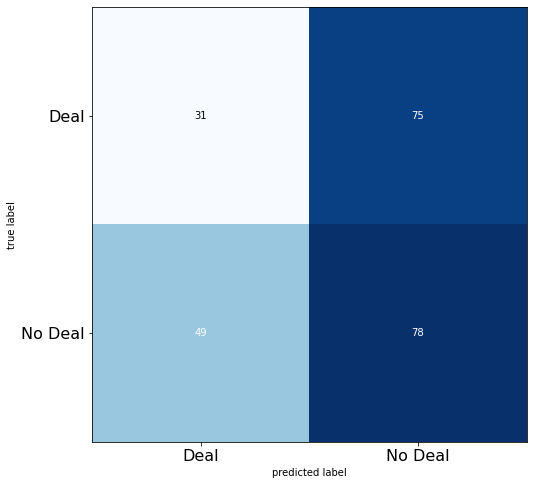

In [31]:
accuracy=metrics.accuracy_score(y_test,y_pred)
print('accuracy: %0.3f'%accuracy)
cm=metrics.confusion_matrix(y_test, y_pred)

plt.figure()
plot_confusion_matrix(cm, figsize=(12,8), hide_ticks=True, cmap=plt.cm.Blues)
plt.xticks(range(2), ['Deal','No Deal'], fontsize=16)
plt.yticks(range(2), ['Deal','No Deal'], fontsize=16)
plt.show()

In [32]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, target_names=['Deal','No Deal']))

              precision    recall  f1-score   support

        Deal       0.39      0.29      0.33       106
     No Deal       0.51      0.61      0.56       127

    accuracy                           0.47       233
   macro avg       0.45      0.45      0.45       233
weighted avg       0.45      0.47      0.46       233



# SVM

In [33]:
#Import svm model
from sklearn import svm

#Create a svm Classifier
clf_svm = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf_svm.fit(train_features, y_train)

#Predict the response for test dataset
y_pred_svm = clf_svm.predict(test_features)

In [34]:
precision_1 = precision_score(y_test, y_pred_svm)
recall_1 = recall_score(y_test, y_pred_svm)
print('Precision: {} / Recall: {} / Accuracy: {}'.format(
    round(precision_1, 3), round(recall_1, 3), round((y_pred_svm==y_test).sum()/len(y_pred_svm), 3)))

Precision: 0.516 / Recall: 0.654 / Accuracy: 0.476


accuracy: 0.476


<Figure size 432x288 with 0 Axes>

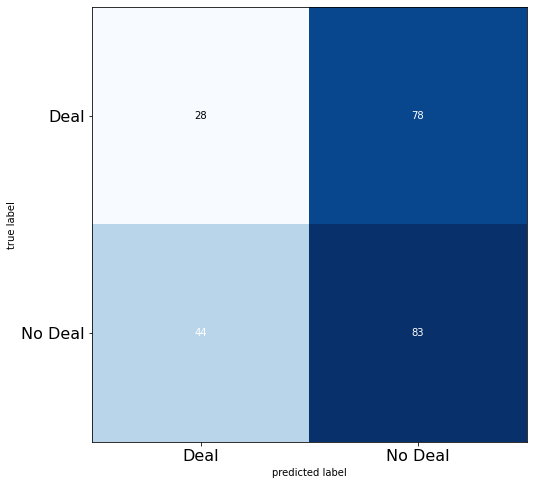

In [35]:
accuracy=metrics.accuracy_score(y_test,y_pred_svm)
print('accuracy: %0.3f'%accuracy)
cm=metrics.confusion_matrix(y_test, y_pred_svm)

plt.figure()
plot_confusion_matrix(cm, figsize=(12,8), hide_ticks=True, cmap=plt.cm.Blues)
plt.xticks(range(2), ['Deal','No Deal'], fontsize=16)
plt.yticks(range(2), ['Deal','No Deal'], fontsize=16)
plt.show()